In [1]:
from imports import *
%matplotlib inline

### Importing The Relevant Datasets ###

In [2]:
## Figure 1
# temps time series for global and Globally
arctic_temp_obs = pd.read_csv('Datasets/arctic_temps_obs.csv')
global_temp_obs = pd.read_csv('Datasets/global_temps_obs.csv')
# Gridded temps trends (w/ and w/o the masking mentioned in Fig1 caption)
OBSAVE_trend = xr.open_dataset('Datasets/OBSAVE_trend.nc')
OBSAVE_trend.attrs['time_span'] = '1979-2021' # specify time frame

## Figure 2 
# AA ratio and percentile in the CMIP6 in fig2
obs_aa_sensitivity = pd.read_csv('Datasets/obs_aa_sensitivity.csv')
obs_aa_perc_cmip6 = pd.read_csv('Datasets/obs_aa_perc_cmip6.csv')

## Figure 3
# 43 year AA ratio from the models
cmip5_aa_ann = pd.read_csv('Datasets/cmip5_aa_ann.csv')
cmip6_aa_ann = pd.read_csv('Datasets/cmip6_aa_ann.csv')
mpi_ge_aa_ann = pd.read_csv('Datasets/mpi-ge_aa_ann.csv')
# 43 year AA ratio from the observations
observed_aa_ann = pd.read_csv('Datasets/observed_aa_ann.csv')

## Figure 4
# AA ratio as a fxn of the starting year of the trend
cmip5_aa_to_present = pd.read_csv('Datasets/cmip5_aa_to_present.csv')
cmip6_aa_to_present = pd.read_csv('Datasets/cmip6_aa_to_present.csv')
mpi_ge_aa_to_present = pd.read_csv('Datasets/mpi-ge_aa_to_present.csv')


""" Need some help on this one """
""" ## Figure 5
# Seasonality of AA from the CMIP6 models
zip_file = ZipFile('Datasets/cmip6_aa_seasonality.zip')
cmip6_aa_seasonality = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
# Seasonality of AA from observation
zip_file = ZipFile('Datasets/obs_aa_seasonality.zip')
obs_aa_seasonality = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')} """
""" Need some help on this one """
print()

## Figure 6
# Freq distributions of all possible 43 year rations (1970-2040?)
# SAME AS FIG 3
# Observed AA ratio
# SAME AS FIG 3


## Figure 1: Converting to netCDF and Plotting ##


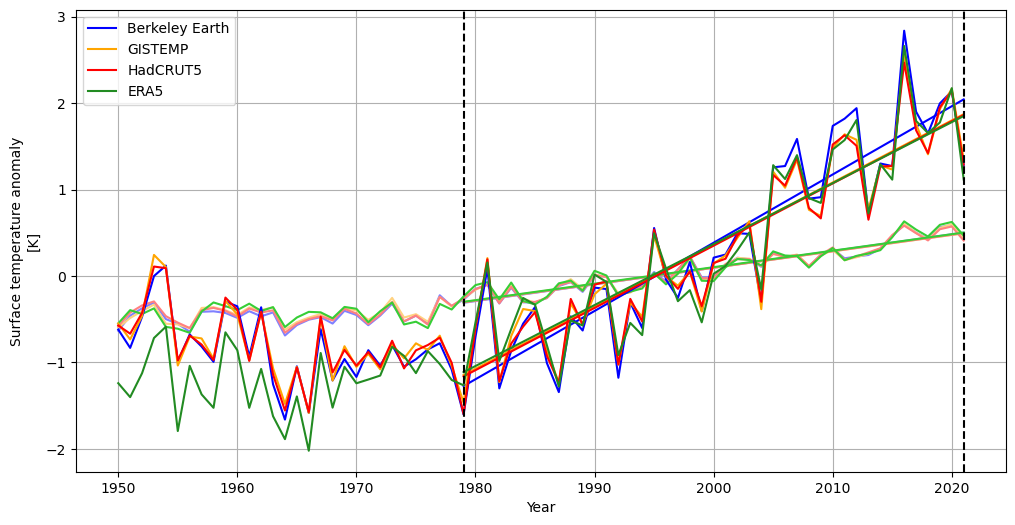

In [3]:
##                               ##
##  Arctic Temp Anomaly Dataset  ##
##                              ##
## Parsing files into a netCDF format
arctic_temp_obs_nc = arctic_temp_obs.to_xarray() # convert to an xarray object for later netCDF storage
arctic_temp_obs_nc = arctic_temp_obs_nc.swap_dims({"index":"Year"})

## Set up proper standard for each data var
arctic_temp_obs_nc.BEST.attrs['plot_name'] = 'Berkeley Earth'
arctic_temp_obs_nc.BEST.attrs['units'] = 'K'
arctic_temp_obs_nc.BEST.attrs['long_name'] = 'Surface temperature anomaly'
arctic_temp_obs_nc.BEST.attrs['cell_methods'] = 'time: mean'

arctic_temp_obs_nc.GISTEMP.attrs['plot_name'] = 'GISTEMP'
arctic_temp_obs_nc.GISTEMP.attrs['units'] = 'K'
arctic_temp_obs_nc.GISTEMP.attrs['long_name'] = 'Surface temperature anomaly'
arctic_temp_obs_nc.GISTEMP.attrs['cell_methods'] = 'time: mean'

arctic_temp_obs_nc.HADCRUT.attrs['plot_name'] = 'HadCRUT5'
arctic_temp_obs_nc.HADCRUT.attrs['units'] = 'K'
arctic_temp_obs_nc.HADCRUT.attrs['long_name'] = 'Surface temperature anomaly'
arctic_temp_obs_nc.HADCRUT.attrs['cell_methods'] = 'time: mean'

arctic_temp_obs_nc.ERA5.attrs['plot_name'] = 'ERA5'
arctic_temp_obs_nc.ERA5.attrs['units'] = 'K'
arctic_temp_obs_nc.ERA5.attrs['long_name'] = 'Surface temperature anomaly'
arctic_temp_obs_nc.ERA5.attrs['cell_methods'] = 'time: mean'

## Save to new location
arctic_temp_obs_nc.to_netcdf(path = 'netCDF Files/Figure 1/arctic_temp_obs.nc')

##                               ##
##  Global Temp Anomaly Dataset  ##
##                               ##
## Parsing files into a netCDF format
global_temp_obs_nc = global_temp_obs.to_xarray() # convert to an xarray object for later netCDF storage
global_temp_obs_nc = global_temp_obs_nc.swap_dims({"index":"Year"})

## Set up proper standard for each data var
global_temp_obs_nc.BEST.attrs['plot_name'] = 'Berkeley Earth'
global_temp_obs_nc.BEST.attrs['units'] = 'K'
global_temp_obs_nc.BEST.attrs['long_name'] = 'Surface temperature anomaly'
global_temp_obs_nc.BEST.attrs['cell_methods'] = 'time: mean'

global_temp_obs_nc.GISTEMP.attrs['plot_name'] = 'GISTEMP'
global_temp_obs_nc.GISTEMP.attrs['units'] = 'K'
global_temp_obs_nc.GISTEMP.attrs['long_name'] = 'Surface temperature anomaly'
global_temp_obs_nc.GISTEMP.attrs['cell_methods'] = 'time: mean'

global_temp_obs_nc.HADCRUT.attrs['plot_name'] = 'HadCRUT5'
global_temp_obs_nc.HADCRUT.attrs['units'] = 'K'
global_temp_obs_nc.HADCRUT.attrs['long_name'] = 'Surface temperature anomaly'
global_temp_obs_nc.HADCRUT.attrs['cell_methods'] = 'time: mean'

global_temp_obs_nc.ERA5.attrs['plot_name'] = 'ERA5'
global_temp_obs_nc.ERA5.attrs['units'] = 'K'
global_temp_obs_nc.ERA5.attrs['long_name'] = 'Surface temperature anomaly'
global_temp_obs_nc.ERA5.attrs['cell_methods'] = 'time: mean'

## Save to new location
global_temp_obs_nc.to_netcdf(path = 'netCDF Files/Figure 1/global_temp_obs.nc')

## Note: This Dataset are missing some attributes that should be included;
## such as institute name, convention, source, history, etc., just running out of time


plt.figure(figsize=(12,6))
colors_dict = {
    'BEST':'blue',
    'GISTEMP':'orange',
    'HADCRUT':'red',
    'ERA5':'forestgreen'
}

# Plot global tempanomaly
for varname, da in global_temp_obs_nc.data_vars.items():
    da.plot(color = adjust_lightness(colors_dict[varname], amount = 1.5))
    # Trend line 1979 to 2021
    dom = np.arange(1979, 2022)
    ran = da.sel(Year = slice(1979, 2021))
    poly = np.poly1d(np.polyfit(dom, ran, 1))
    plt.plot(dom, poly(dom), color = adjust_lightness(colors_dict[varname], amount = 1.5))
# Plot arctic tempanomaly
for varname, da in arctic_temp_obs_nc.data_vars.items():
    da.plot(label = da.plot_name, color = colors_dict[varname])
    # Trend line 1979 to 2021
    dom = np.arange(1979, 2022)
    ran = da.sel(Year = slice(1979, 2021))
    poly = np.poly1d(np.polyfit(dom, ran, 1))
    plt.plot(dom, poly(dom), color = colors_dict[varname])

# Mark 1979 and 2021 
plt.axvline(1979, color = 'black', linestyle = '--')
plt.axvline(2021, color = 'black', linestyle = '--')

plt.legend()
plt.grid()
plt.savefig('netCDF Files/Figure 1/Figure1.png')


I'm interested in the variation of the trends across various timeframes. Rantanen, et al. chose the 1979-2021 range due to "more accurate remote sensing observations from the Arctic" during this period, but it was also selected because this period exhibits stronger artic amplification than previous decades. However, in selecting a time period around the same variable we are investigating, it could introduce unforseen bias. I don't believe that's happening with these data, but it could be interesting to look at warming in the arctic compared to global trends across different intervals. I do still want to note possible discrepancy in data quality between decades (a benefit of limiting to 1979-2021).

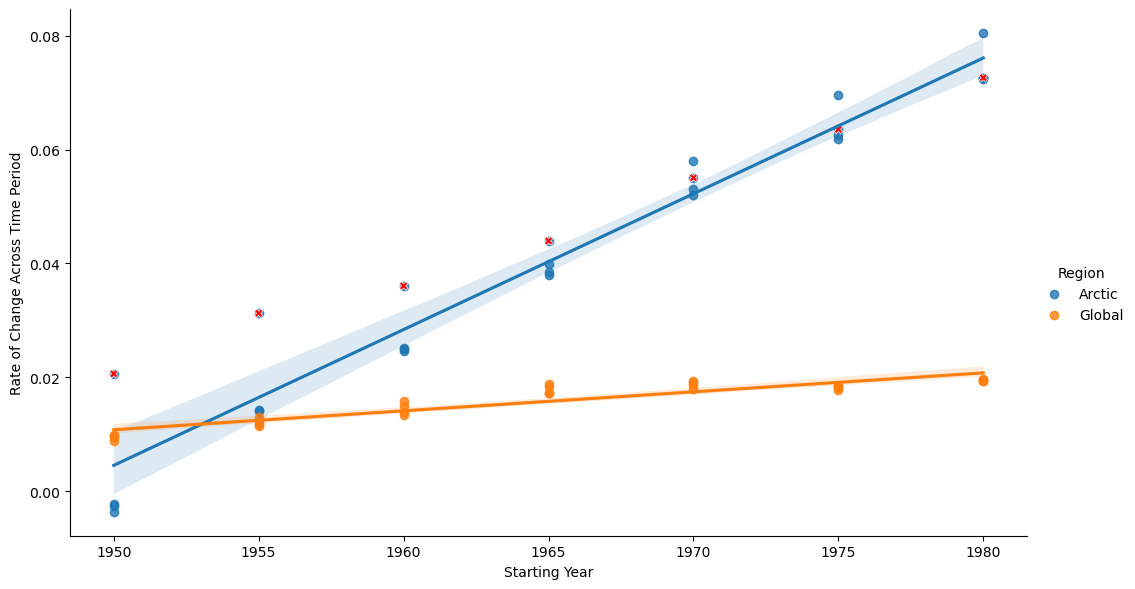

In [75]:
## Plot in ~40 year windowns
window = np.arange(1950, 1991)
data1 = []


for i in range(0,31,5):
    temp = window + i
    for varname, da in arctic_temp_obs_nc.data_vars.items():
        ran = da.sel(Year = temp)
        poly = np.polyfit(temp, ran, 1)
        data1.append(['Arctic',varname,temp[0],f'{temp[0]} to {temp[-1]}', poly[0]])
        
df = pd.DataFrame(data = data1, columns = ['Region','Source','Starting Year','Time Period', 'Rate of Change Across Time Period'])


window = np.arange(1950, 1991)
data1 = []
for i in range(0,31,5):
    temp = window + i
    for varname, da in global_temp_obs_nc.data_vars.items():
        ran = da.sel(Year = temp)
        poly = np.polyfit(temp, ran, 1)
        data1.append(['Global',varname,temp[0],f'{temp[0]} to {temp[-1]}', poly[0]])
        
df1 = pd.DataFrame(data = data1, columns = ['Region','Source','Starting Year','Time Period', 'Rate of Change Across Time Period'])
df2 = pd.concat([df,df1])

#fig, ax = sns.plt.subplots()

ax = sns.lmplot(data = df2, x = 'Starting Year', y = 'Rate of Change Across Time Period', hue = 'Region', height=6, aspect=1.75)
ax = sns.scatterplot(data = df2[(df2["Source"]=='ERA5') & (df2["Region"] == "Arctic")], x = 'Starting Year', y = 'Rate of Change Across Time Period', legend = False, hue = 'Region', palette = ['Red'], style = "Region", markers = {"Arctic":'X'})
